<a href="https://colab.research.google.com/github/oerv13-gh/Ibero/blob/main/Clase_graficas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Asegúrate de que pandas esté importado
import numpy as np

# Define la ruta del archivo
file_path = "/content/sample_data/california_housing_train.csv"

# Cargar el DataFrame
try:
    df_housing = pd.read_csv(file_path)
    print("✅ El DataFrame de precios de vivienda de California ha sido cargado con éxito.")
except FileNotFoundError:
    print(f"❌ Error: El archivo no fue encontrado en la ruta: {file_path}")
    df_housing = None # Asegurarse de que df_housing sea None si falla la carga

✅ El DataFrame de precios de vivienda de California ha sido cargado con éxito.


In [ ]:
df_housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  median_house_value  \
0          1015.0       472.0         1.4936             66900.0   
1          1129.0       463.0         1.8200             80100.0   
2           333.0       117.0         1.6509             85700.0   
3           515.0       226.0         3.1917             73400.0   
4           624.0       262.0         1.9250             65500.0   
...           ...         ...            ...                 ...   
16995       907.0       369.0         2.3571            111400.0   
16996      1194.0       465.0         2.5179             79000.0   
16997      1244.0       456.0         3.0313            103600.0   
16998      1298.0       478.0         1.9797             85800.0   
16999       806.0       270.0         3.0147             94600.0   

      income_category  normalized_value  normalized_value_small   age_group  \
0                <20k           13380.0                   669.0  10-20 años   
1                <20k           16020.0                   801.0  10-20 años   
2                <20k           17140.0                   857.0  10-20 años   
3              20-40k           14680.0                   734.0  10-20 años   
4                <20k           13100.0                   655.0  10-20 años   
...               ...               ...                     ...         ...   
16995          20-40k           22280.0                  1114.0    +40 años   
16996          20-40k           15800.0                   790.0  30-40 años   
16997          20-40k           20720.0                  1036.0  10-20 años   
16998            <20k           17160.0                   858.0  10-20 años   
16999          20-40k           18920.0                   946.0    +40 años   

       average_rooms  
0          11.889831  
1          16.522678  
2           6.153846  
3           6.641593  
4           5.549618  
...              ...  
16995       6.008130  
16996       5.051613  
16997       5.870614  
16998       5.589958  
16999       6.740741  

[17000 rows x 14 columns]

In [ ]:
if df_housing is not None:
    print("\n--- A. Primeras 5 Filas (Columnas) ---")
    print(df_housing.head(10))
    print(df_housing.tail(5))



--- A. Primeras 5 Filas (Columnas) ---
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   
5    -114.58     33.63                29.0       1387.0           236.0   
6    -114.58     33.61                25.0       2907.0           680.0   
7    -114.59     34.83                41.0        812.0           168.0   
8    -114.59     33.61                34.0       4789.0          1175.0   
9    -114.60     34.83                46.0       1497.0           309.0   

   population  households  median_income  median_house_value income_category  \
0      1015.0       472.0         1.4936             6

In [ ]:
if df_housing is not None:
    print("\n--- B. Información y Tipos de Datos ---")
    df_housing.info()



--- B. Información y Tipos de Datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
if df_housing is not None:
    print("\n--- C. Forma del DataFrame (Filas, Columnas) ---")
    print(df_housing.shape)


--- C. Forma del DataFrame (Filas, Columnas) ---
(17000, 9)


Primeras Gráficas Descriptivas
Utilizaremos las variables clave: el valor mediano de la casa (median_house_value) y el ingreso mediano (median_income).

In [ ]:


# Configuramos el estilo para mejor visualización
sns.set_style("whitegrid")

1. Distribución del Precio (median_house_value)
El Histograma y el gráfico de Densidad (KDE) son esenciales para ver la distribución de la variable objetivo.

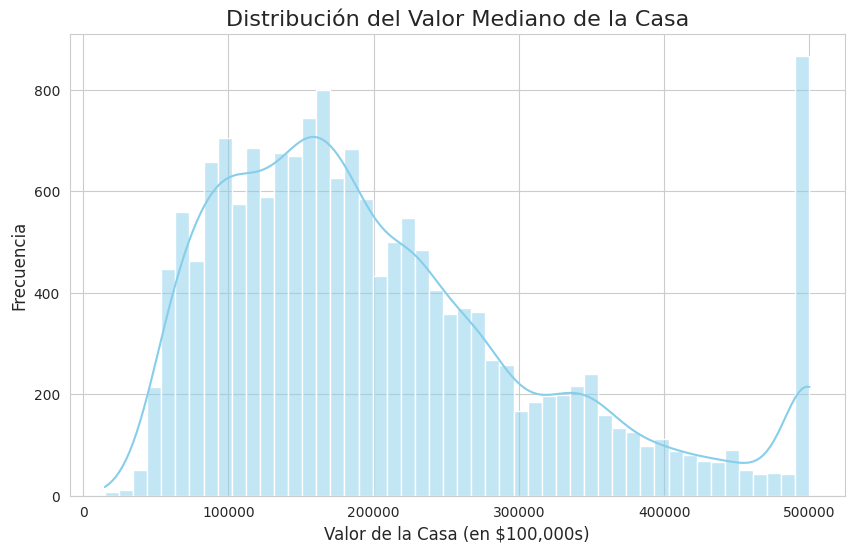

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(
    df_housing['median_house_value'],
    bins=50,
    kde=True,
    color='skyblue'
)
plt.title('Distribución del Valor Mediano de la Casa', fontsize=16)
plt.xlabel('Valor de la Casa (en $100,000s)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

El Gráfico de Dispersión es la mejor herramienta para visualizar la relación entre dos variables cuantitativas. La relación entre el Ingreso (median_income) y el Precio (median_house_value) es fundamental.

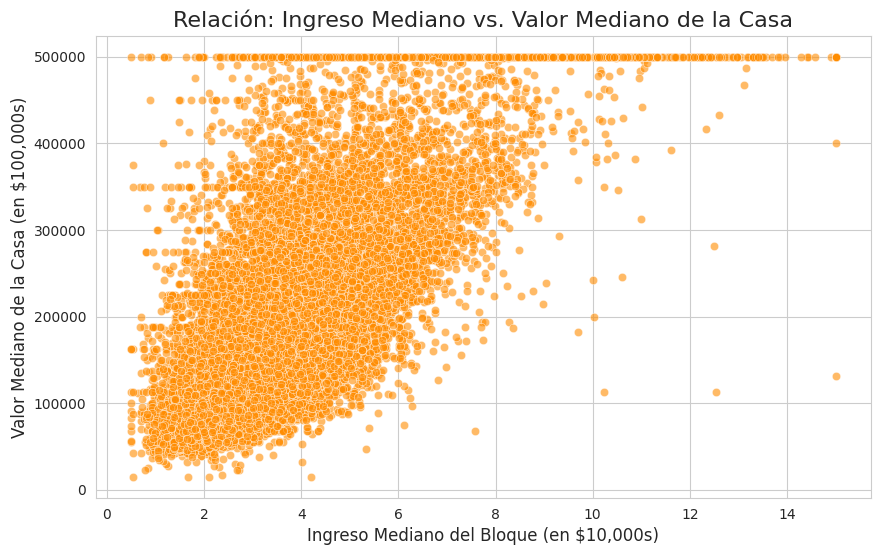

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='median_income',
    y='median_house_value',
    data=df_housing,
    alpha=0.6,
    color='darkorange'
)
plt.title('Relación: Ingreso Mediano vs. Valor Mediano de la Casa', fontsize=16)
plt.xlabel('Ingreso Mediano del Bloque (en $10,000s)', fontsize=12)
plt.ylabel('Valor Mediano de la Casa (en $100,000s)', fontsize=12)
plt.show()

Edad de las casas

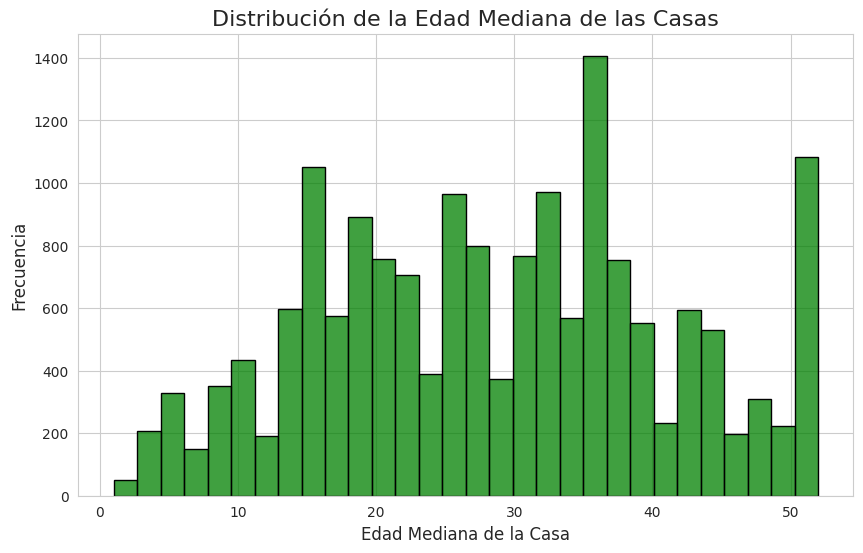

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(
    df_housing['housing_median_age'],
    bins=30,
    color='green',
    edgecolor='black'
)
plt.title('Distribución de la Edad Mediana de las Casas', fontsize=16)
plt.xlabel('Edad Mediana de la Casa', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

Boxplot

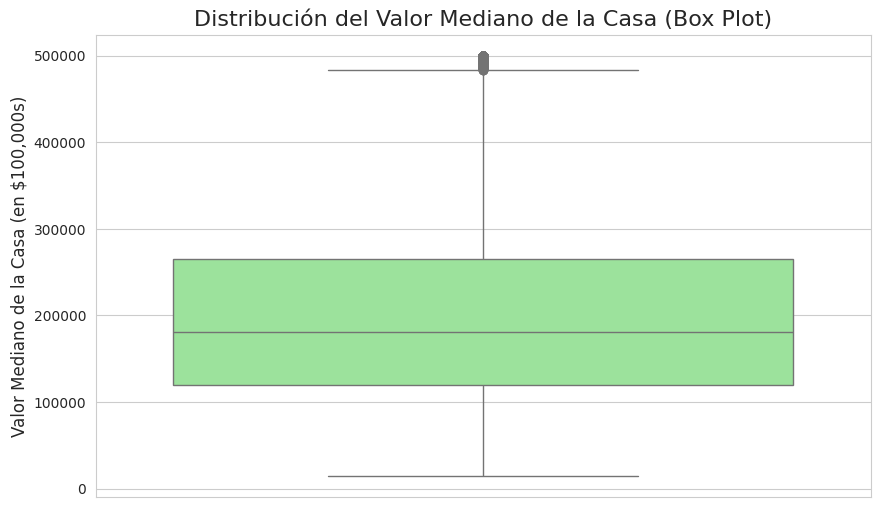

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='median_house_value', data=df_housing, color='lightgreen')
plt.title('Distribución del Valor Mediano de la Casa (Box Plot)', fontsize=16)
plt.ylabel('Valor Mediano de la Casa (en $100,000s)', fontsize=12)
plt.show()

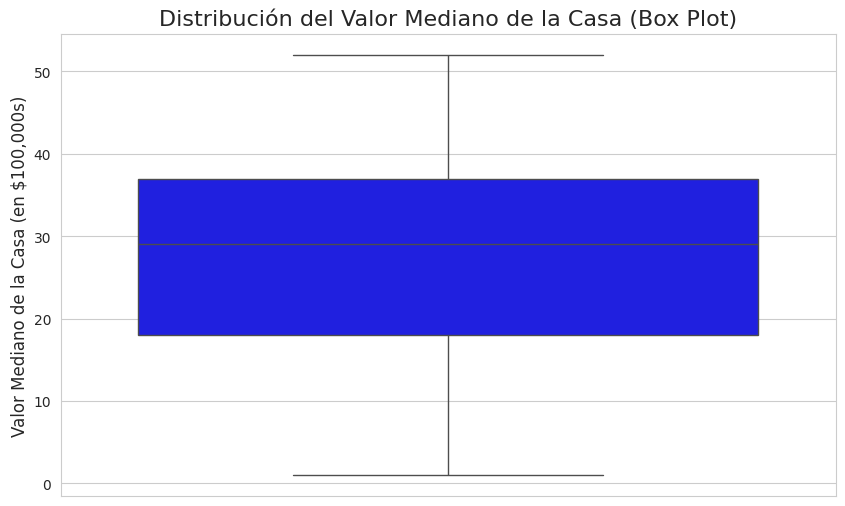

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='housing_median_age', data=df_housing, color='blue')
plt.title('Distribución del Valor Mediano de la Casa (Box Plot)', fontsize=16)
plt.ylabel('Valor Mediano de la Casa (en $100,000s)', fontsize=12)
plt.show()

Violin


/tmp/ipython-input-97427184.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='income_category', y='median_house_value', data=df_housing,


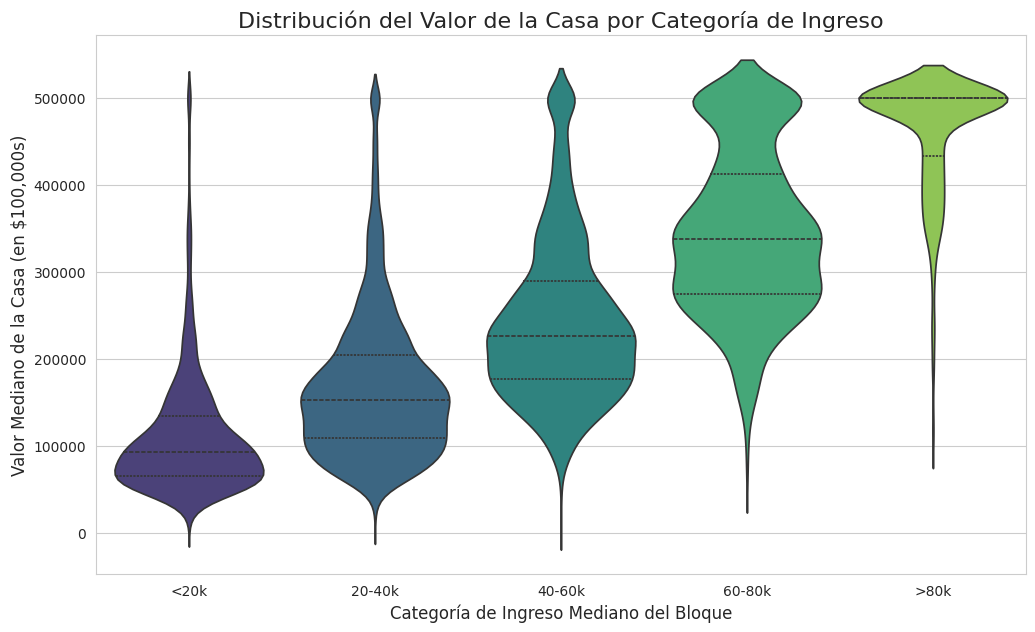

In [ ]:
# Crear una variable categórica a partir de median_income
df_housing['income_category'] = pd.cut(df_housing['median_income'],
                                       bins=[0, 2, 4, 6, 8, np.inf],
                                       labels=['<20k', '20-40k', '40-60k', '60-80k', '>80k'])

plt.figure(figsize=(12, 7))
sns.violinplot(x='income_category', y='median_house_value', data=df_housing,
               inner='quartile', palette='viridis', order=['<20k', '20-40k', '40-60k', '60-80k', '>80k'])
plt.title('Distribución del Valor de la Casa por Categoría de Ingreso', fontsize=16)
plt.xlabel('Categoría de Ingreso Mediano del Bloque', fontsize=12)
plt.ylabel('Valor Mediano de la Casa (en $100,000s)', fontsize=12)
plt.show()


heatmap

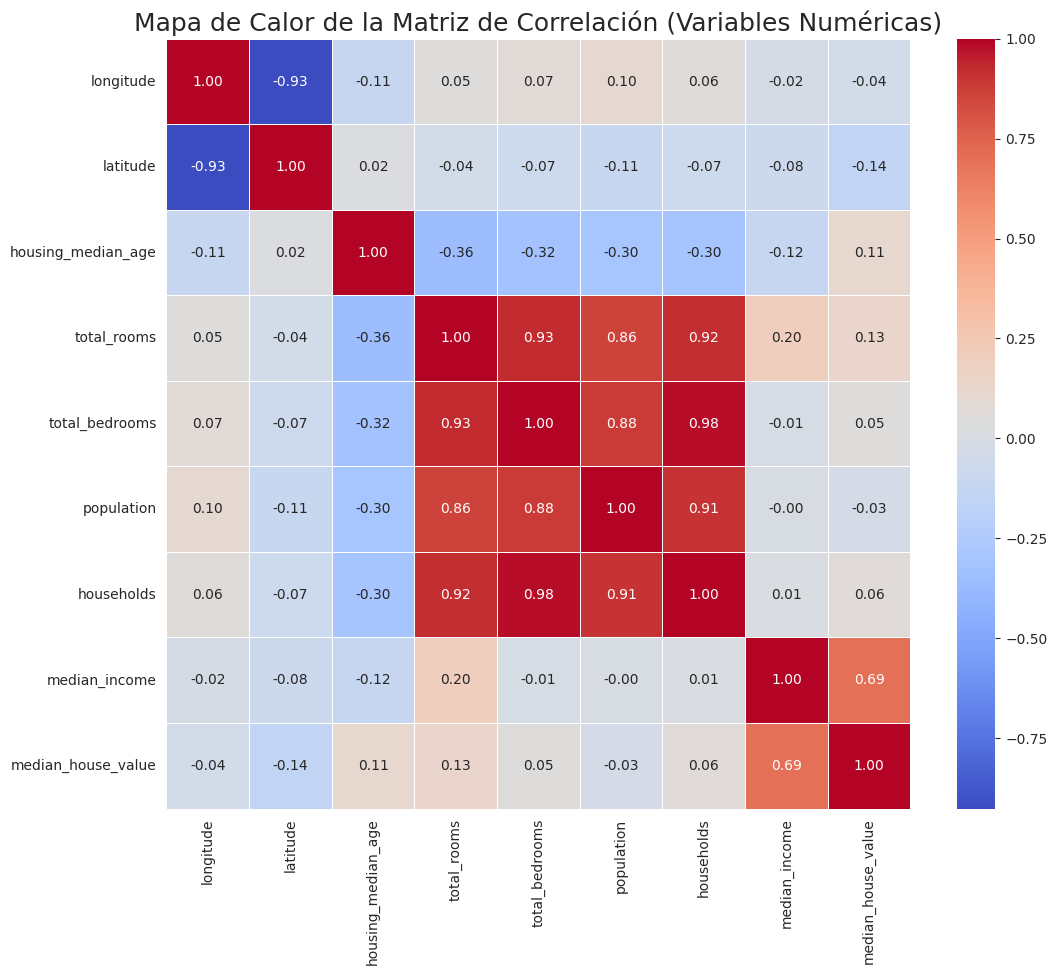

In [ ]:


# --- Código Corregido para el Heatmap ---

plt.figure(figsize=(12, 10))

# 1. Identificar columnas no numéricas que deben ser excluidas
# Nota: La columna 'income_category' es la problemática.
# Si tu dataset original no tiene la columna 'Ocean Proximity', puedes usar todas las columnas.

# Excluimos la columna categórica 'income_category'
numeric_df = df_housing.drop(columns=['income_category'])

# 2. Calcular la matriz de correlación solo con variables numéricas
correlation_matrix = numeric_df.corr()

# 3. Generar el Heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Mapa de Calor de la Matriz de Correlación (Variables Numéricas)', fontsize=18)
plt.show()

Pair plot

<Figure size 1000x1000 with 0 Axes>

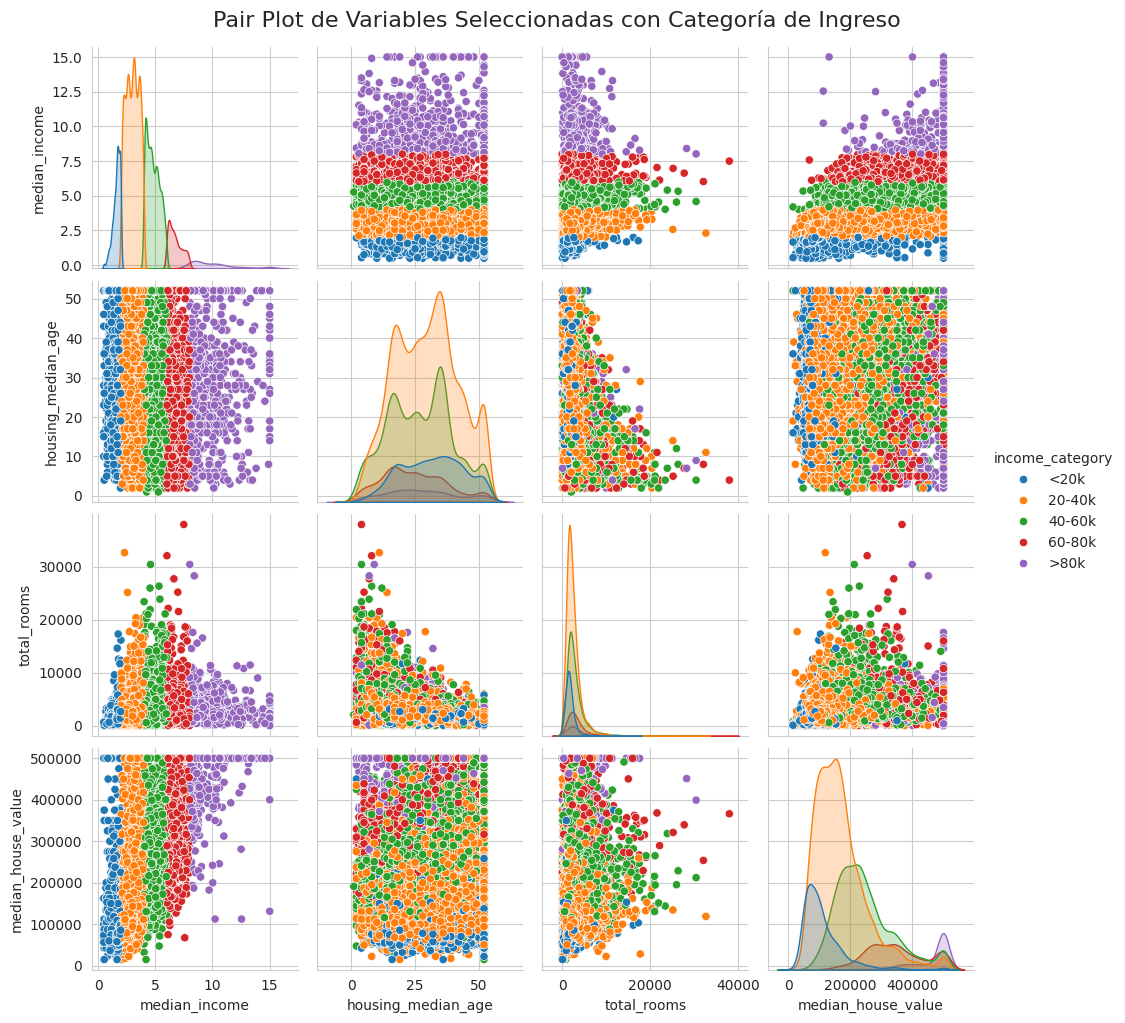

✅ Pair Plot generado exitosamente con la columna 'income_category' re-creada.


In [ ]:


# 1. Asegúrate de que el DataFrame esté cargado (si aún no lo está)
# file_path = "/content/sample_data/california_housing_train.csv"
# df_housing = pd.read_csv(file_path)

# 2. Re-crear la variable categórica 'income_category'
# Esto se basa en la variable 'median_income' que SÍ existe en tu CSV.
df_housing['income_category'] = pd.cut(df_housing['median_income'],
                                       bins=[0, 2, 4, 6, 8, np.inf],
                                       labels=['<20k', '20-40k', '40-60k', '60-80k', '>80k'])

# 3. Ejecutar el Pair Plot (Corregido)
cols_to_plot = ['median_income', 'housing_median_age', 'total_rooms', 'median_house_value']

plt.figure(figsize=(10, 10)) # El Pair Plot no necesita plt.figure, pero lo mantenemos por convención

# Se utiliza la columna recién creada 'income_category' para colorear los puntos
sns.pairplot(
    df_housing[cols_to_plot + ['income_category']], # Asegúrate de incluir 'income_category' si lo usas en hue
    hue='income_category',
    palette='tab10',
    diag_kind='kde' # Usa KDE en la diagonal para una mejor visualización de densidad
)
plt.suptitle('Pair Plot de Variables Seleccionadas con Categoría de Ingreso', y=1.02, fontsize=16)
plt.show()

print("✅ Pair Plot generado exitosamente con la columna 'income_category' re-creada.")

Bar plot


⚠️ 'Ocean Proximity' no encontrada. Mostrando conteo para 'income_category' en su lugar.


/tmp/ipython-input-3144126452.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income_category', data=df_housing, palette='viridis', order=['<20k', '20-40k', '40-60k', '60-80k', '>80k'])


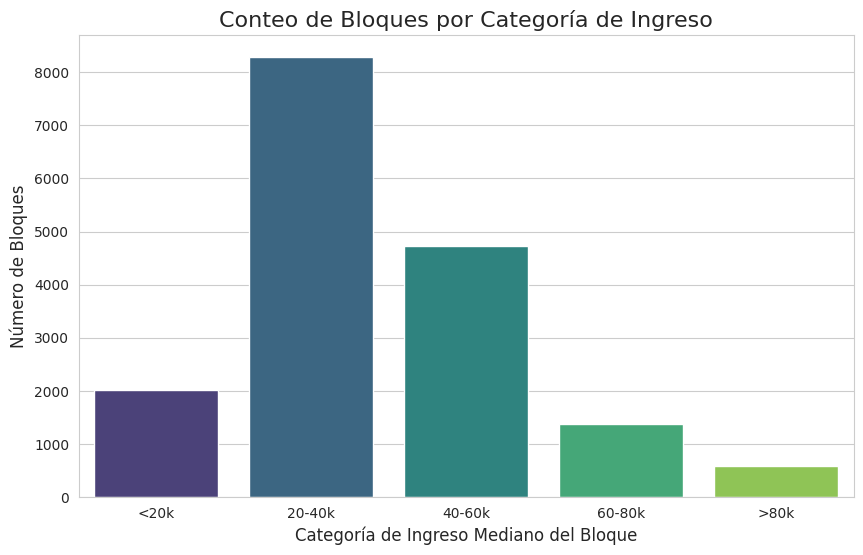

In [ ]:
# Primero, volvemos a cargar si no tenemos la columna 'Ocean Proximity'
# (La versión train.csv no siempre tiene esta columna directamente, pero la versión load_dataset sí)
# Si tu CSV no tiene 'Ocean_proximity', usaremos la 'income_category' creada
if 'Ocean Proximity' in df_housing.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Ocean Proximity', data=df_housing, palette='coolwarm', order=df_housing['Ocean Proximity'].value_counts().index)
    plt.title('Conteo de Bloques por Proximidad al Océano', fontsize=16)
    plt.xlabel('Proximidad al Océano', fontsize=12)
    plt.ylabel('Número de Bloques', fontsize=12)
    plt.show()
else:
    print("\n⚠️ 'Ocean Proximity' no encontrada. Mostrando conteo para 'income_category' en su lugar.")
    plt.figure(figsize=(10, 6))
    sns.countplot(x='income_category', data=df_housing, palette='viridis', order=['<20k', '20-40k', '40-60k', '60-80k', '>80k'])
    plt.title('Conteo de Bloques por Categoría de Ingreso', fontsize=16)
    plt.xlabel('Categoría de Ingreso Mediano del Bloque', fontsize=12)
    plt.ylabel('Número de Bloques', fontsize=12)
    plt.show()

Dispersion geográfica

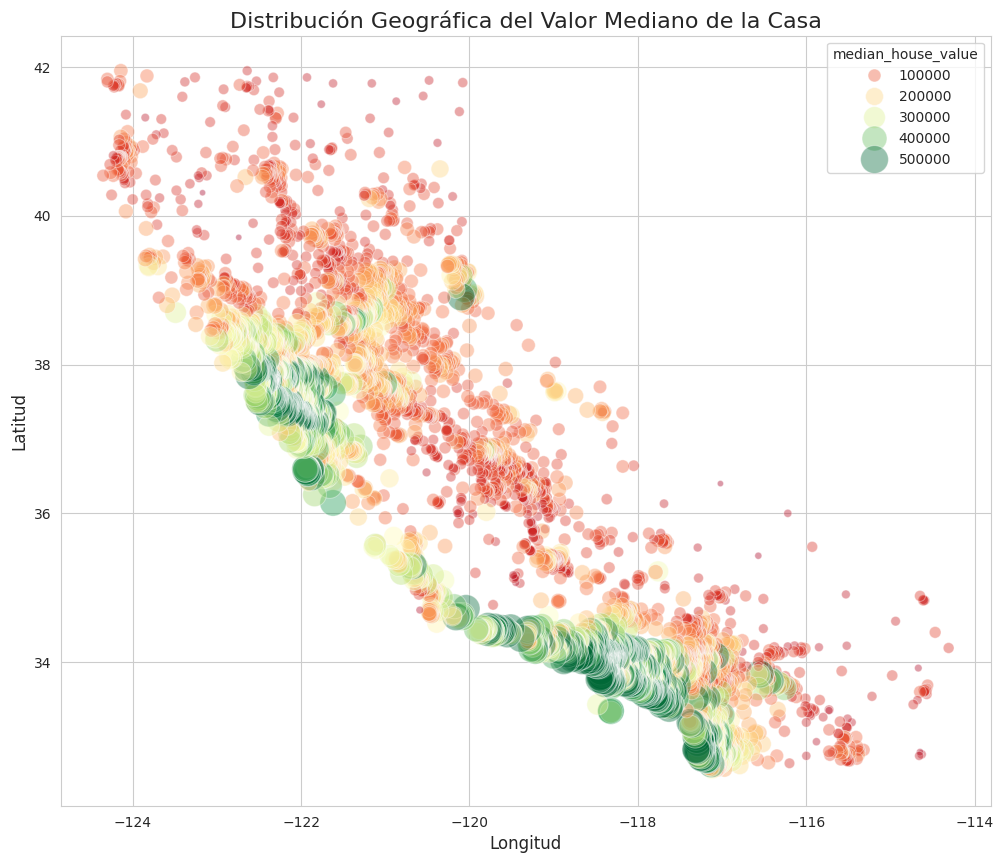

In [ ]:
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='longitude',
    y='latitude',
    hue='median_house_value',
    size='median_house_value', # El tamaño del punto también puede indicar el valor
    palette='RdYlGn', # Un mapa de color divergente es bueno aquí
    sizes=(20, 400), # Rango de tamaños para los puntos
    alpha=0.4,
    data=df_housing
)
plt.title('Distribución Geográfica del Valor Mediano de la Casa', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.show()

Folium

In [ ]:
!pip install folium
import folium
import pandas as pd # Para el DataFrame

In [ ]:
import folium
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1. Preparar los datos
# Usaremos una muestra reducida para evitar la sobrecarga del mapa
sample_df = df_housing.sample(n=1000, random_state=42).copy()

# 2. Estandarizar el precio para el radio (Escala Min-Max)
# Esto comprime el rango de precios en el rango [0, 1]
scaler = MinMaxScaler()
sample_df['radius_scale'] = scaler.fit_transform(sample_df[['median_house_value']])

# 3. Calcular el centro del mapa
center_lat = sample_df['latitude'].mean()
center_lon = sample_df['longitude'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Definir la función de color (se mantiene igual, usando el valor original)
def get_color(value):
    # Usamos valores originales (en $100k)
    if value < 2.0: return 'green'
    elif value < 4.0: return 'orange'
    else: return 'red'

# 4. Iterar y Agregar Marcadores
for index, row in sample_df.iterrows():
    # CLAVE: Multiplicar la escala (0 a 1) por un factor de radio muy pequeño (ej. 5)
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        # El radio ahora es: (0 a 1) * 5. Máximo radio es 5 píxeles.
        radius=row['radius_scale'] * 5,
        popup=f"Precio: ${row['median_house_value'] * 100000:,.0f}",
        color=get_color(row['median_house_value']),
        fill=True,
        fill_color=get_color(row['median_house_value'])
    ).add_to(m)

print("✅ Mapa re-escalado con estandarización y listo para mostrar.")

# Mostrar el mapa
m

✅ Mapa re-escalado con estandarización y listo para mostrar.


boxplot ingreso medio

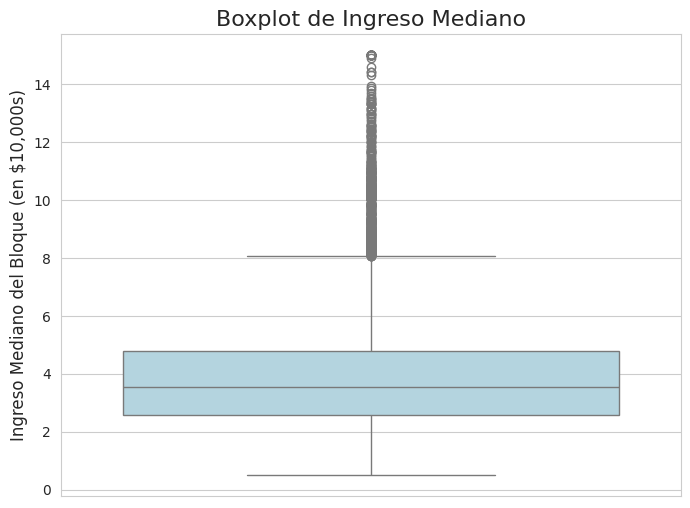

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_housing['median_income'], color='lightblue')
plt.title('Boxplot de Ingreso Mediano', fontsize=16)
plt.ylabel('Ingreso Mediano del Bloque (en $10,000s)', fontsize=12)
plt.show()

Ingreso medio del valor medio

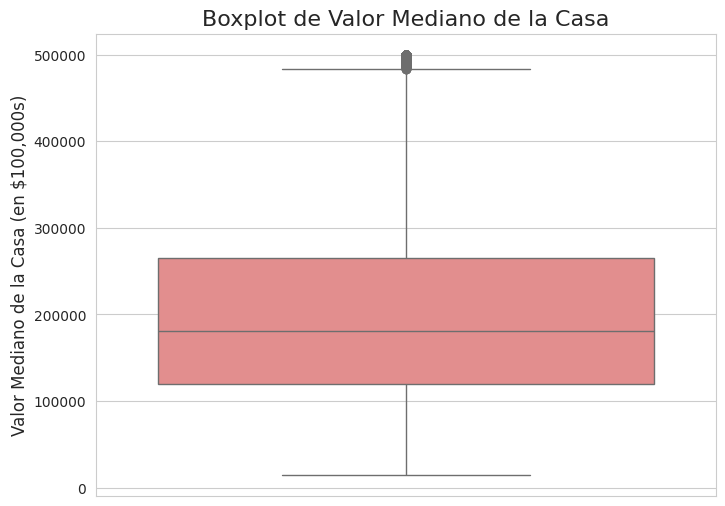

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_housing['median_house_value'], color='lightcoral')
plt.title('Boxplot de Valor Mediano de la Casa', fontsize=16)
plt.ylabel('Valor Mediano de la Casa (en $100,000s)', fontsize=12)
plt.show()

Boxplot de Comparación por Proximidad

/tmp/ipython-input-1176594225.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income_category', y='median_house_value', data=df_housing,


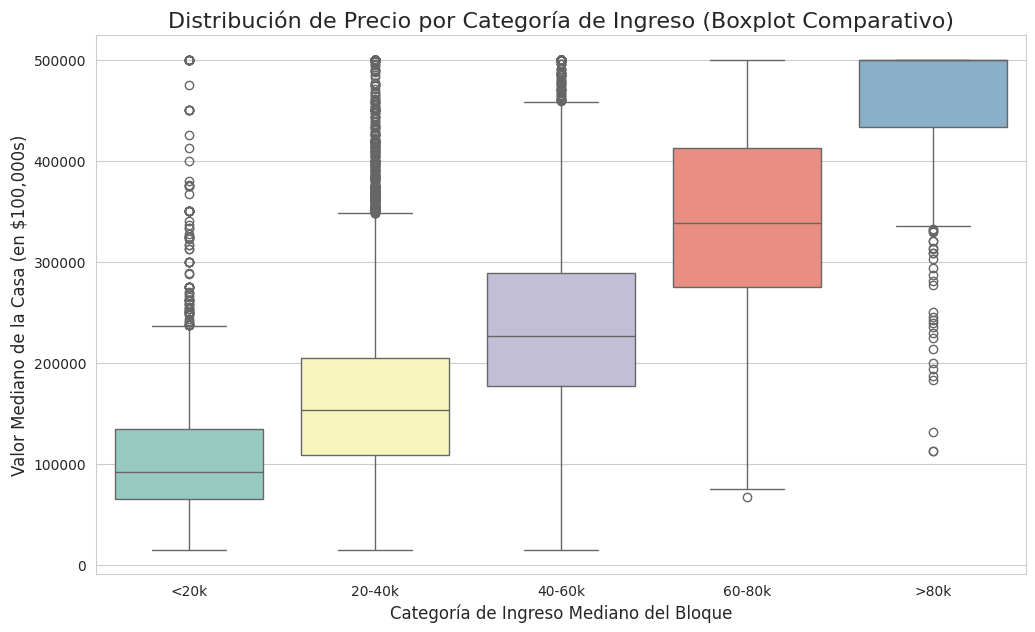

In [ ]:
# Si no tienes Ocean Proximity en tu CSV, puedes usar la 'income_category' creada
if 'income_category' in df_housing.columns:
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='income_category', y='median_house_value', data=df_housing,
                palette='Set3', order=['<20k', '20-40k', '40-60k', '60-80k', '>80k'])
    plt.title('Distribución de Precio por Categoría de Ingreso (Boxplot Comparativo)', fontsize=16)
    plt.xlabel('Categoría de Ingreso Mediano del Bloque', fontsize=12)
    plt.ylabel('Valor Mediano de la Casa (en $100,000s)', fontsize=12)
    plt.show()
else:
    print("⚠️ La columna 'income_category' no está disponible para el boxplot comparativo.")

Densidad de probabilidad bivariada

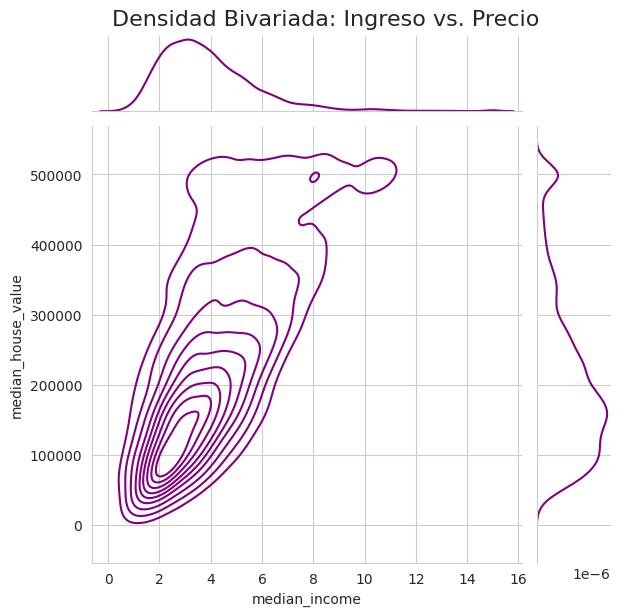

In [ ]:
# Muestra la relación entre Ingreso Mediano (median_income) y Precio (median_house_value)
sns.jointplot(
    x='median_income',
    y='median_house_value',
    data=df_housing,
    kind='kde', # Usa el tipo KDE (Estimación de Densidad del Kernel)
    color='purple'
)
plt.suptitle('Densidad Bivariada: Ingreso vs. Precio', y=1.02, fontsize=16)
plt.show()

Reg plot

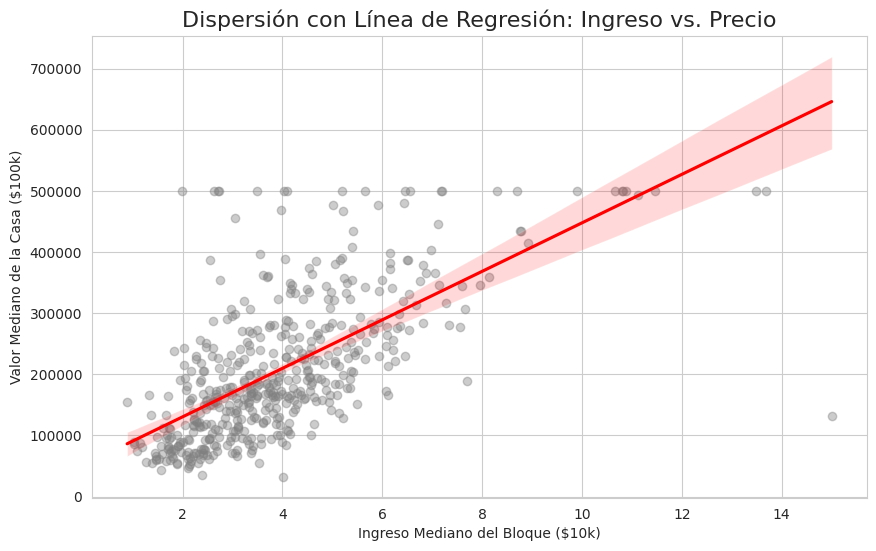

In [ ]:
plt.figure(figsize=(10, 6))
# El 'regplot' añade automáticamente la línea de regresión y el área de confianza
sns.regplot(
    x='median_income',
    y='median_house_value',
    data=df_housing.sample(500), # Usar una muestra para que el gráfico sea más limpio
    scatter_kws={'alpha':0.4, 'color':'gray'}, # Estilo de los puntos
    line_kws={'color':'red'} # Estilo de la línea de regresión
)
plt.title('Dispersión con Línea de Regresión: Ingreso vs. Precio', fontsize=16)
plt.xlabel('Ingreso Mediano del Bloque ($10k)')
plt.ylabel('Valor Mediano de la Casa ($100k)')
plt.show()

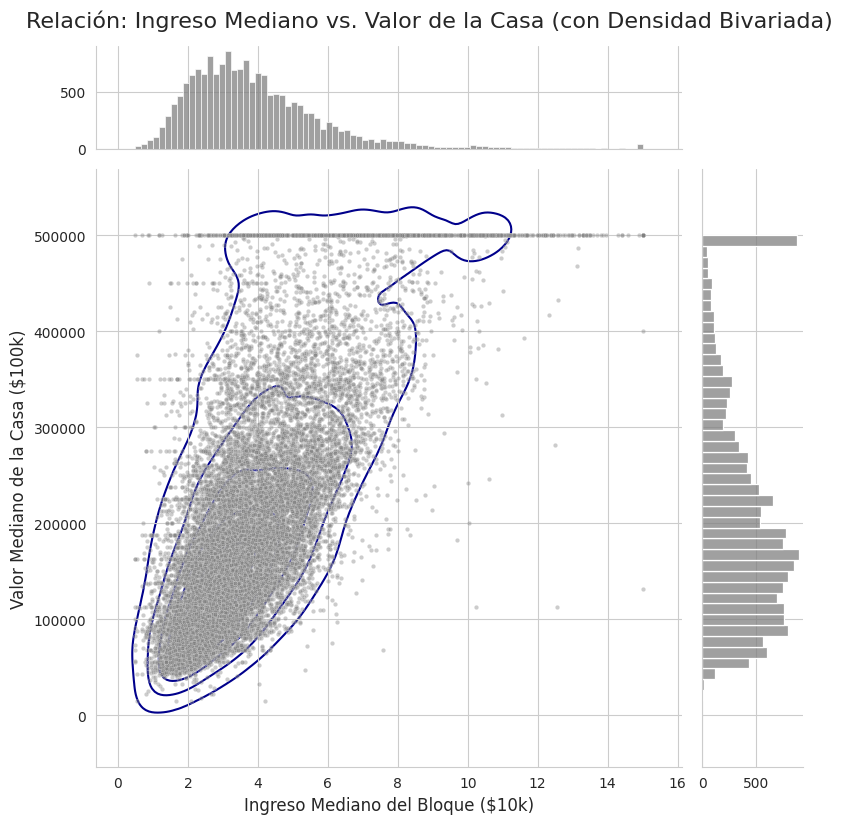

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Joint Plot con Scatter y Densidad Bivariada (Corregido) ---

# Crear el joint plot
g = sns.jointplot(
    x='median_income',         # Variable en el eje X
    y='median_house_value',    # Variable en el eje Y
    data=df_housing,           # Tu DataFrame
    kind='scatter',            # Tipo de gráfico principal: scatter plot
    height=8,
    ratio=5,
    space=0.2,
    marginal_ticks=True,

    # ARGUMENTOS CORREGIDOS: Pasar 'alpha' y 'color' directamente
    alpha=0.4,
    s=10,
    color='gray'
)

# Añadir las líneas de contorno de densidad (KDE) al gráfico central
# Esto superpone la densidad bivariada sobre el scatter plot.
g.plot_joint(sns.kdeplot, zorder=0, levels=6, color='darkblue', linewidths=1.5)

# Personalizar los títulos y etiquetas
g.set_axis_labels('Ingreso Mediano del Bloque ($10k)', 'Valor Mediano de la Casa ($100k)', fontsize=12)
g.fig.suptitle('Relación: Ingreso Mediano vs. Valor de la Casa (con Densidad Bivariada)', y=1.02, fontsize=16)

plt.show()

Areas apiladas

/tmp/ipython-input-1555283898.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_table = df_housing.groupby('age_group')['total_rooms'].sum().reset_index()


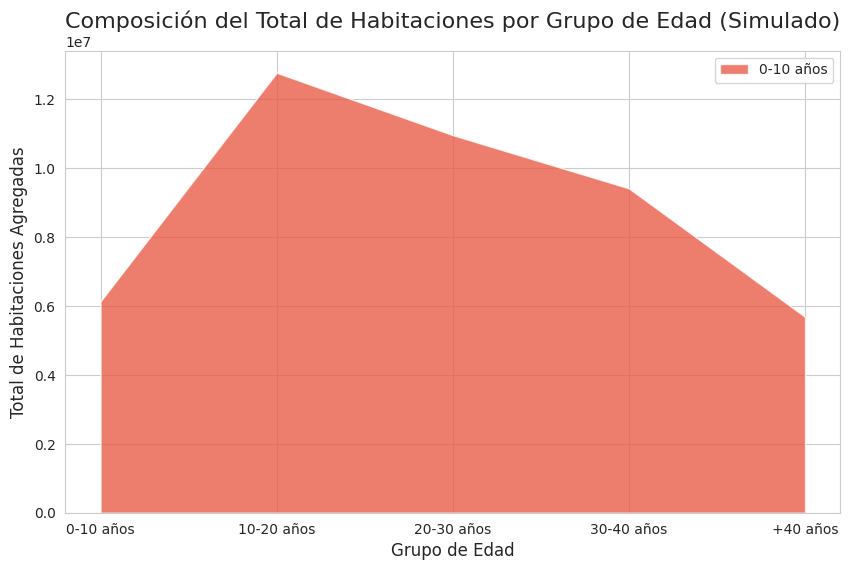

In [ ]:
# Crearemos una tabla pivot (simulada) para el ejemplo
pivot_table = df_housing.groupby('age_group')['total_rooms'].sum().reset_index()

plt.figure(figsize=(10, 6))
# Este tipo de gráfico funciona mejor con una dimensión temporal, pero lo usamos para la composición
plt.stackplot(
    pivot_table['age_group'],
    pivot_table['total_rooms'],
    labels=pivot_table['age_group'],
    alpha=0.8,
    colors=sns.color_palette("Spectral", n_colors=len(pivot_table))
)
plt.title('Composición del Total de Habitaciones por Grupo de Edad (Simulado)', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Total de Habitaciones Agregadas', fontsize=12)
plt.legend(loc='upper right')
plt.show()

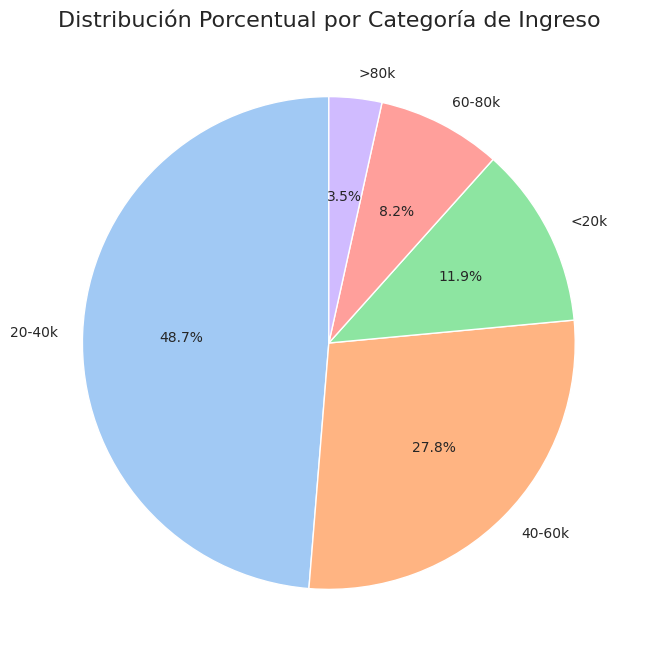

In [ ]:
# Calcular las frecuencias de cada categoría de ingreso
income_counts = df_housing['income_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    income_counts,
    labels=income_counts.index,
    autopct='%1.1f%%', # Formato para mostrar porcentajes
    startangle=90,
    colors=sns.color_palette("pastel")
)
plt.title('Distribución Porcentual por Categoría de Ingreso', fontsize=16)
plt.show()

Q-Q plot

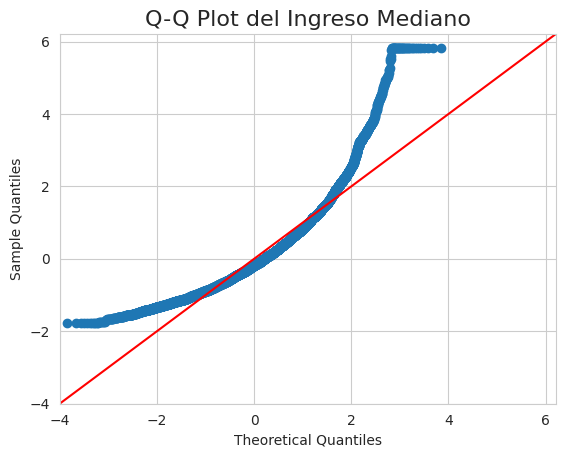

In [ ]:
import statsmodels.api as sm
import pylab as py

# Crear el gráfico Q-Q para el Ingreso Mediano
sm.qqplot(
    df_housing['median_income'],
    line='45', # Dibuja la línea diagonal de referencia
    fit=True  # Ajusta la línea a la distribución de los datos
)
py.title('Q-Q Plot del Ingreso Mediano', fontsize=16)
py.show()

ridge plot

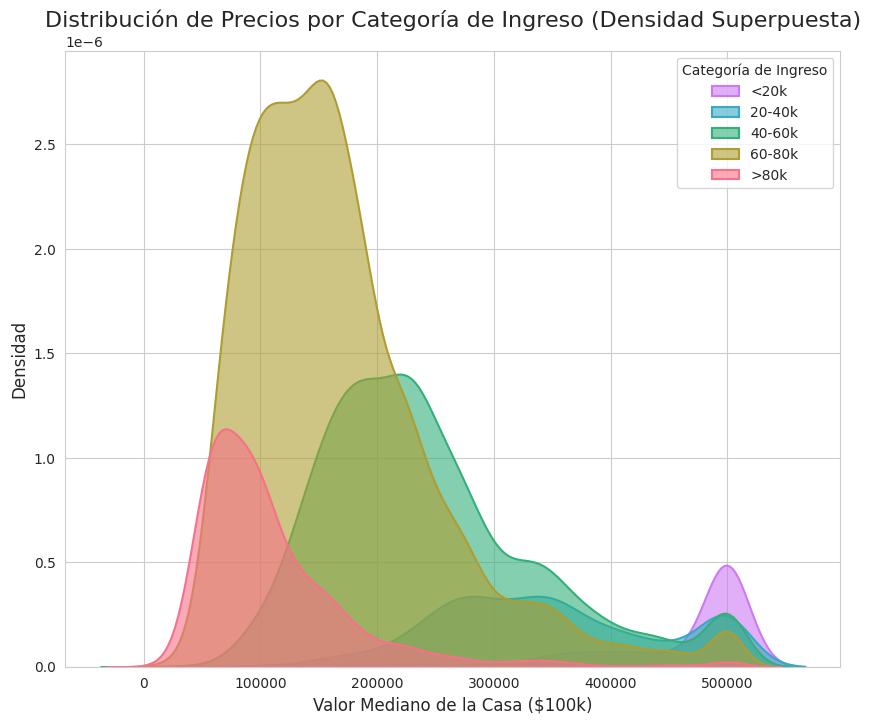

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Asegúrate de que df_housing y la columna 'income_category' estén cargados

# Definir el orden de las categorías para la leyenda y el gráfico
income_order = ['<20k', '20-40k', '40-60k', '60-80k', '>80k']

plt.figure(figsize=(10, 8))
ax = sns.kdeplot(
    data=df_housing,
    x='median_house_value',
    hue='income_category',
    fill=True,
    palette=sns.color_palette("husl", 5),
    alpha=0.6,
    linewidth=1.5,
    # CLAVE: Usamos 'order' para asegurar que la leyenda sigue la misma secuencia
    hue_order=income_order
)
plt.title('Distribución de Precios por Categoría de Ingreso (Densidad Superpuesta)', fontsize=16)
plt.xlabel('Valor Mediano de la Casa ($100k)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)

# CLAVE: Colocar la leyenda y asegurar que se muestre
ax.legend(title='Categoría de Ingreso', loc='upper right', labels=income_order)
plt.show()

Swarm plot

Gráfico de Puntos de Dispersión Agrupados (Swarm Plot)
El Swarm Plot es una alternativa al Box Plot que muestra todos los puntos de datos individuales sin superponerlos, lo que permite ver la densidad de los puntos dentro de cada categoría. Es ideal para conjuntos de datos con un número manejable de observaciones.

Propósito Descriptivo: Muestra la distribución real de cada punto y es excelente para pequeñas comparaciones de categorías.

Aplicación al Housing Data: Compara la distribución de las Habitaciones Promedio (average_rooms) por las Categorías de Ingreso

In [ ]:
# Crea la columna calculada, dividiendo el total de habitaciones entre el número de hogares
df_housing['average_rooms'] = df_housing['total_rooms'] / df_housing['households']

print("✅ Columna 'average_rooms' creada exitosamente.")

✅ Columna 'average_rooms' creada exitosamente.


/tmp/ipython-input-2469842200.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 19.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 25.2% of the points

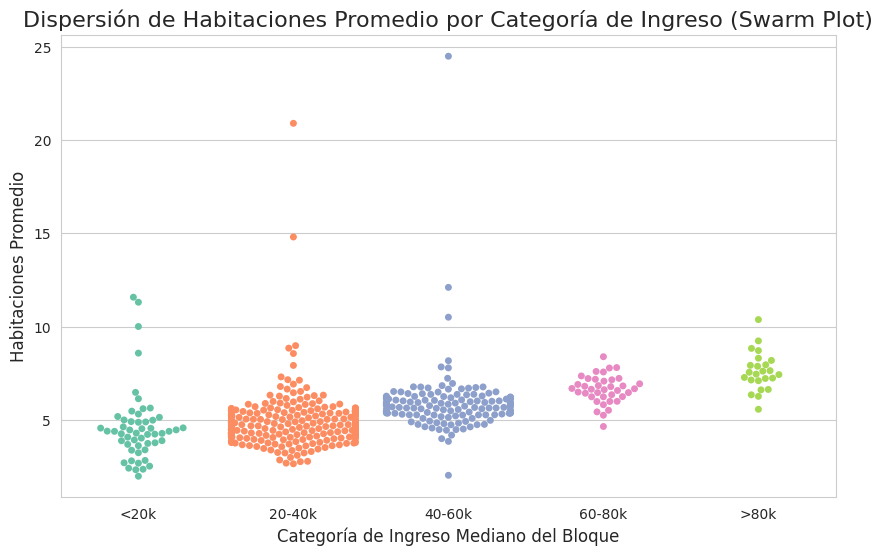

✅ Swarm Plot generado correctamente.


In [ ]:
# Usaremos una muestra muy pequeña (ej. 500) para que el gráfico no se sature
sample_df_small = df_housing.sample(n=500, random_state=42)

plt.figure(figsize=(10, 6))
sns.swarmplot(
    x='income_category',
    y='average_rooms',  # Ahora esta columna existe y es correcta
    data=sample_df_small,
    palette='Set2',
    order=['<20k', '20-40k', '40-60k', '60-80k', '>80k']
)
plt.title('Dispersión de Habitaciones Promedio por Categoría de Ingreso (Swarm Plot)', fontsize=16)
plt.xlabel('Categoría de Ingreso Mediano del Bloque', fontsize=12)
plt.ylabel('Habitaciones Promedio', fontsize=12)
plt.show()

print("✅ Swarm Plot generado correctamente.")

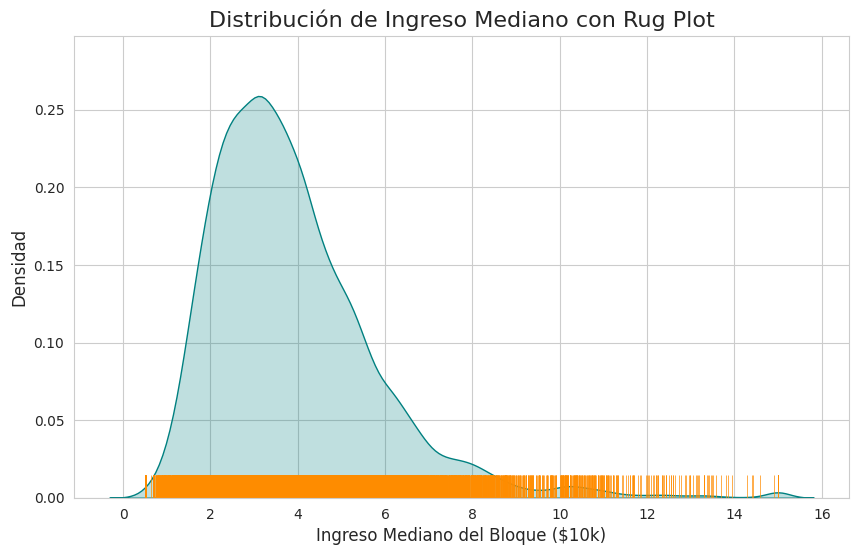

In [ ]:
plt.figure(figsize=(10, 6))
# El rug plot se combina con kdeplot para mostrar la densidad y la ubicación de los puntos
sns.kdeplot(
    df_housing['median_income'],
    fill=True,
    color='teal'
)
sns.rugplot(
    df_housing['median_income'],
    height=0.05,
    color='darkorange',
    linewidth=0.5
)
plt.title('Distribución de Ingreso Mediano con Rug Plot', fontsize=16)
plt.xlabel('Ingreso Mediano del Bloque ($10k)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.show()